In [13]:
########## Çoklu Doğrusal Regresyon ##########

# Gerekli kütüphaneleri indirelim:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [14]:
# Veri Setini İndiriyoruz ve ilk beşini görüntülüyoruz:
veri = pd.read_excel('https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1')
veri.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [15]:
# Veri setinin boyutuna bakalım:
veri.shape

(191, 6)

In [16]:
# Veri setinin tanımlayıcı istatistik özetine bakalım:
veri.describe()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
count,191.0000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,95.0000,649.476440,2.340314,85.183246,3.931937,12.753927
std,55.2811,111.064174,0.721401,16.482620,3.752974,8.374596
min,0.0000,450.000000,1.000000,40.000000,0.000000,0.000000
25%,47.5000,575.000000,2.000000,80.000000,0.000000,4.000000
50%,95.0000,650.000000,2.000000,90.000000,3.000000,16.000000
75%,142.5000,700.000000,3.000000,95.000000,7.000000,20.000000
max,190.0000,1175.000000,3.000000,125.000000,11.000000,24.000000


In [17]:
# Veri setinde eksik veri var mı diye kontrol edelim:
veri.isnull().any()

Unnamed: 0    False
Fiyat         False
Oda_Sayısı    False
Net_m2        False
Katı          False
Yaşı          False
dtype: bool

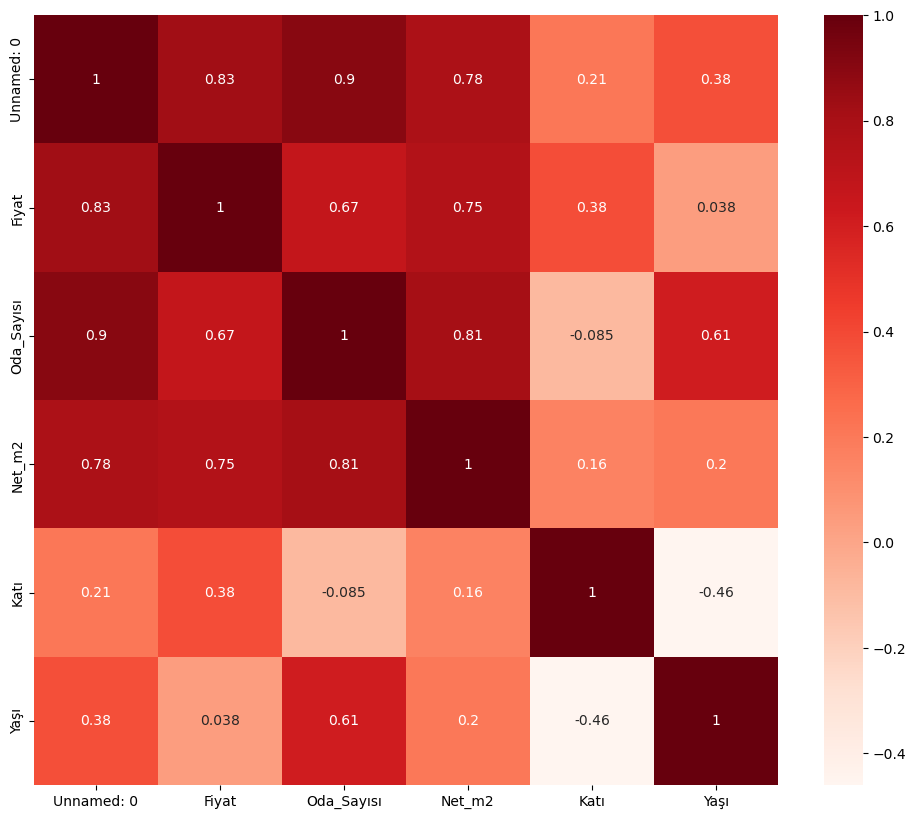

In [18]:
# Veri setindeki tüm değişkenlerin kendi aralarındaki korelasyonlarını
# görselleştirelim:
plt.figure(figsize=(12,10))
cor = veri.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

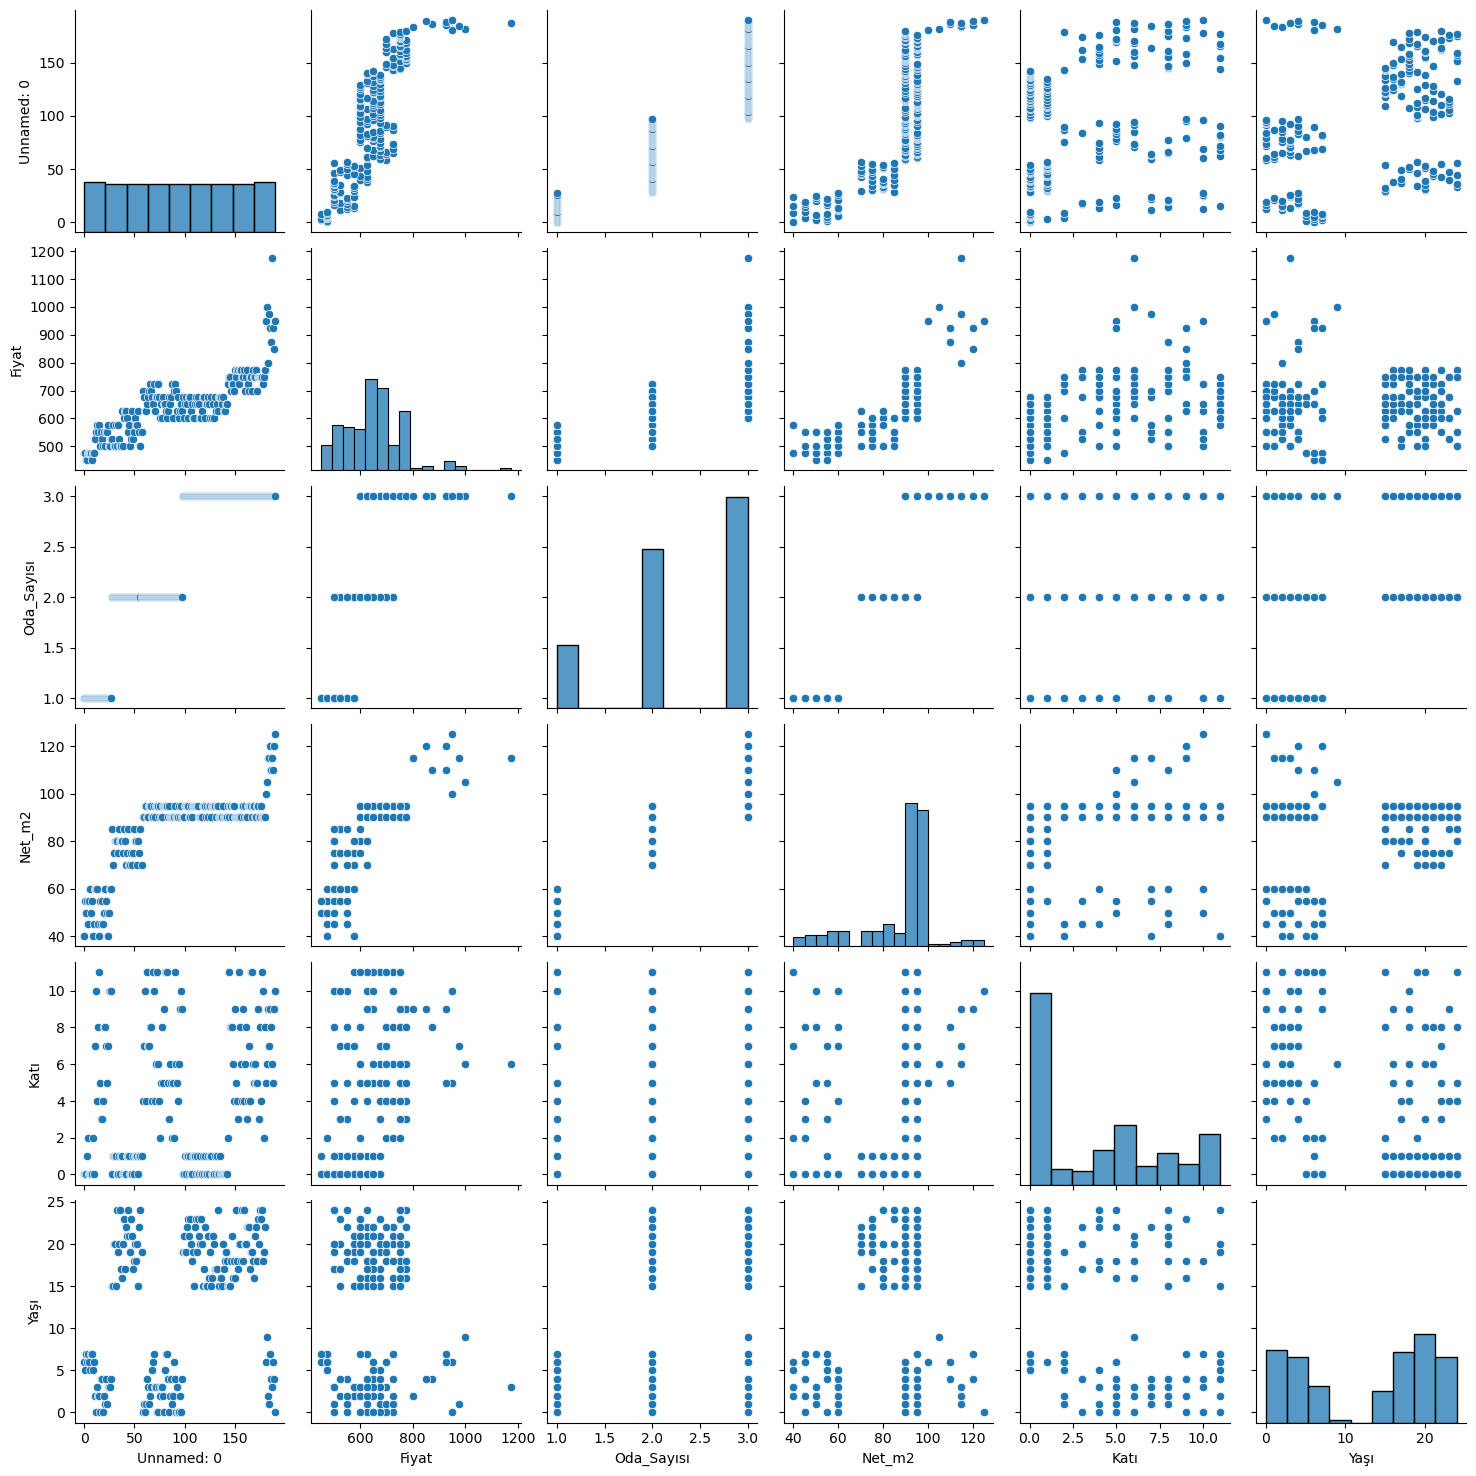

In [19]:
# Tüm değişkenlerin birbirleri ile olan serpilme diyagramlarına bakalım:
sns.pairplot(veri)

/tmp/ipykernel_14261/2229933005.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(veri['Fiyat'])


<Axes: xlabel='Fiyat', ylabel='Density'>

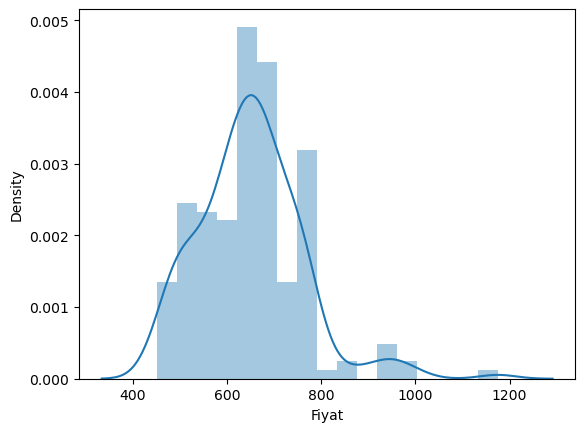

In [20]:
# Hedef değişkeni olan Fiyat değişkeninin dağılımına bakalım:
sns.distplot(veri['Fiyat'])

In [21]:
# Hedef (y) ve öznitelik değişkenlerini (X) tanımlayalım:
X = veri[['Oda_Sayısı', 'Net_m2', 'Katı', 'Yaşı']]
y = veri['Fiyat']
# 41 # Veri setini rassal olarak eğitim (train) ve test veri seti olarak ikiye
# 42 # ayırıyoruz. Veri setinin % kaçının eğitim ve % kaçının test veri seti
# 43 # olduğunu belirlemek için "test_size" parametresine değer giriyoruz.
# 44 # Burada test_size=0.2, yani veri setinin %80'i eğitim %20'si test seti.
# 45 # Ayrıca, "random_state" parametresi için bir değer girdiğimizde algoritma her
# 46 # çalıştırıldığında veri setini aynı şekilde rassal olarak böler.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 49 # Algoritmayı eğitip eğitim verisi üzerinden model oluşturmasını sağlayalım:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [22]:
# 53 # Sabit (intercept) ve öznitelik değişkenlerinin eğitim veri seti için
# 54 # tahmin edilen parametrelerine bakalım:
print("Sabit (Intercept):", model.intercept_)

Sabit (Intercept): 305.162589528776


In [23]:
# 57 # Katsayıları bir DataFrame içinde düzenli görelim:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Öznitelik_Katsayıları'])
coeff_df

,Öznitelik_Katsayıları
Oda_Sayısı,118.350670
Net_m2,1.133092
Katı,7.096886
Yaşı,-4.665706


In [25]:
y_pred_test = model.predict(X_test)

In [26]:
y_pred_test

array([706.59771491, 654.37003543, 747.7476064 , 692.28564638,
       720.47653797, 537.57127776, 459.7021826 , 521.31775431,
       669.87851125, 686.30681024, 682.87587641, 720.79148736,
       488.46115633, 725.65384704, 686.30681024, 781.01399849,
       725.65384704, 696.95135276, 716.92888167, 518.53483344,
       540.6285928 , 504.51802648, 648.90122835, 673.54446364,
       687.81659329, 660.54709848, 720.47653797, 502.88994734,
       530.29742604, 665.32952734, 728.69147428, 693.91372552,
       457.8390849 , 695.63822301, 708.91059866, 714.89100842,
       686.30681024, 779.77922594, 822.96699067])

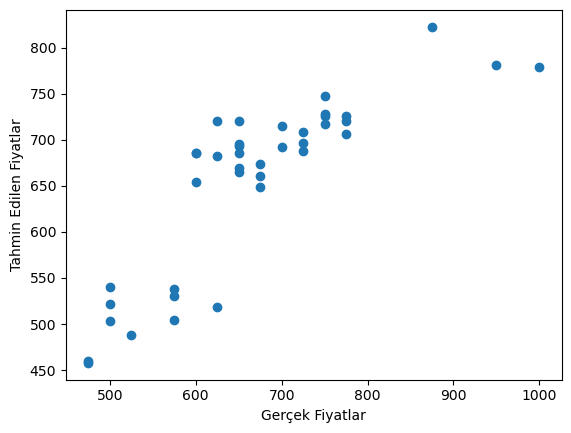

In [27]:
# 91 # Test verisindeki hedef değişkeninin gerçek ve tahmin edilmiş değerlerinin
# 92 # serpilme grafiği:
# Not: y_pred_test değişkeninin daha önce tanımlandığından emin olun (y_pred_test = model.predict(X_test))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.show()

In [28]:
# 95 # Şimdi de 3 odalı, 8 yıllık bir binanın 4. katında bulunan 105 m2 net
# 96 # kullanım alanına sahip olan bir dairenin fiyatını tahmin edelim:
Oda_Sayısı = 3
Net_m2 = 105
Katı = 4
Yaşı = 8

# Modeli kullanarak tahmin yapıyoruz:
yeni_tahmin = model.predict([[Oda_Sayısı, Net_m2, Katı, Yaşı]])
print('Yeni Evin Fiyatı (₺):', yeni_tahmin)

# 102 # Görseldeki beklenen çıktı: ₺770.251

Yeni Evin Fiyatı (₺): [770.25115988]


/home/berkyilmaz/anaconda3/envs/machine_learning/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
